## Machine learning 1 & Introduction to Machine Learning and Data Mining
# Homework 3: Language bias of decision trees

1. Generate two synthetic datasets to study the behavior of decision trees.
- Attributes A, B and C should have random values between 0 and 1
- There should be 10.000 examples in the test set and 300 in the training set
- Target variable „A>B“, should have value „true“ if A>B, else “false”

2. Visualize the test data: Scatterplot with _A_ and _B_ on the axes, the color should be _"A>B"_

3. Plot also the training set in (a separate) Scatterplot

4. Fit a decision tree
- Fit and evaluate a decision tree
- Visualize the predicted values in a scatterplot

5. How does the training set size influence the model performance?
- Make a for-loop of different training sizes from 5 to 300 examples
- Make a plot with training set size on the X-axis and classification accuracy on the Y-axis

6. Write a paragraph about your findings. Try to address "why" the resuls are as they are. 

_Hints_: 
- Use ```numpy.random.rand(num_examples)``` to get a vector of random numbers from module ```numpy```.
- Use ```plt.scatter``` from ```import matplotlib.pyplot as plt``` for the visualizations





In [1]:
#You can use this function to generate random data for the homework.

import numpy as np
import pandas as pd

def generate_data(num_examples):
    """ Generate random data with columns A, B and C and target A>B. """
    A = np.random.rand(num_examples)
    B = np.random.rand(num_examples)
    C = np.random.rand(num_examples)
    target = A > B

    # Create a dataframe
    df = pd.DataFrame({'A': A, 'B': B, 'C': C, 'A>B': target})
    return df



In [2]:
#1st step: generate 2 datasets
testset = generate_data(10000)
trainset = generate_data(300)

Text(0.5, 1.0, 'Scatter plot of A and B')

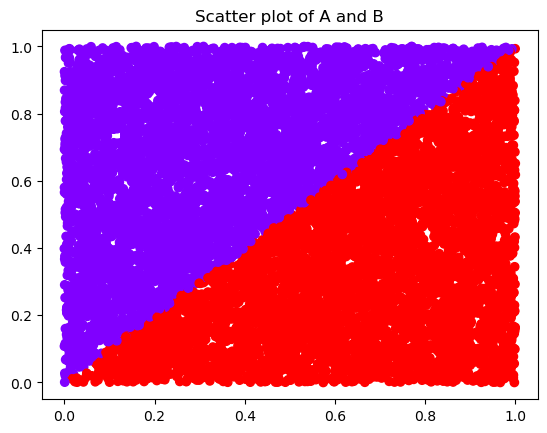

In [3]:
#2-3: Scatterplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into attributes, and target
x_tr = trainset[["A", "B", "C"]]
y_tr = trainset['A>B']
x_te = testset[["A", "B", "C"]]
y_te = testset['A>B']
plt.scatter(x_te['A'], x_te['B'], c=y_te, cmap='rainbow') #Just added rainbow to make it look bearable to human eyes
plt.title('Scatter plot of A and B')



Even distribution of the points, geometrically what we want (uniform distribution for x,y coordinates between 0 and 1).

We can see that there is a split in colors whether A>B, recogniseable by the diagonal disection.



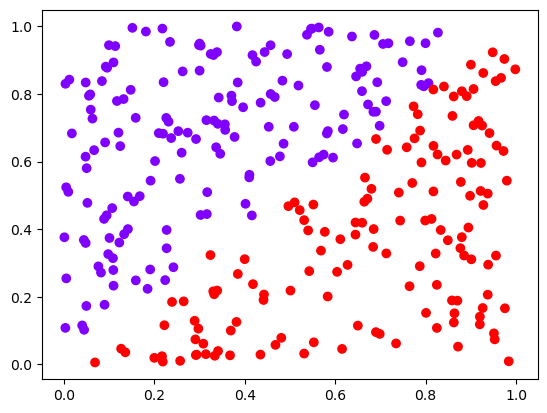

In [4]:
#3
plt.scatter(trainset['A'], trainset['B'], c=trainset['A>B'], cmap='rainbow') #can be just done like this too

Looks nice

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

DecisionTreeClassifier(criterion='entropy', random_state=20001104)

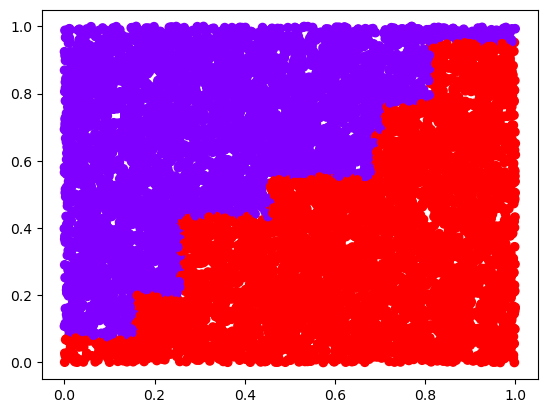

In [5]:
#4th step: fit a decision tree (Scikit etc.) + prediction scatterplot
clf = DecisionTreeClassifier(random_state=20001104, criterion="entropy")   #state is my birthday :)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_te)
plt.scatter(x_te['A'], x_te['B'], c=y_pred, cmap='rainbow')
help(clf)
clf

As we can see, this seed led to some "misunderstanding" in the case when A is around 0.36 and there are some minor mistakes for big values. Let's check the accuracy:

In [26]:
#Accuracy
print("Accuracy:", accuracy_score(y_te, y_pred))

Accuracy: 0.9403


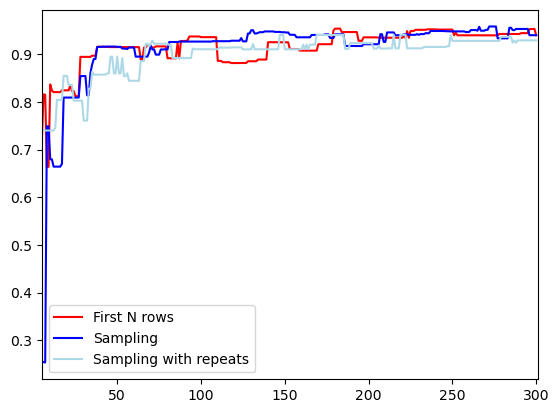

In [44]:
#5: Size influence on the accuracy of the model

#1st method: taking the first 5-300 rows
accuracy_scores1 = []
for i in range(5,301):
    newset1 = trainset.iloc[:i]
    x_new1 = newset1[["A", "B", "C"]]
    y_new1 = newset1['A>B']
    clf.fit(x_new1, y_new1)
    y_pred_new1 = clf.predict(x_te)
    accuracy_scores1.append(accuracy_score(y_te, y_pred_new1))

#2nd method: sampling 5-300 (without repeats)
accuracy_scores2 = []
for i in range(5,301):
    newset2 = trainset.sample(n=i, random_state=20001104)
    x_new2 = newset2[["A", "B", "C"]]
    y_new2 = newset2['A>B']
    clf.fit(x_new2, y_new2)
    y_pred_new2 = clf.predict(x_te)
    accuracy_scores2.append(accuracy_score(y_te, y_pred_new2))

#3rd method: sampling 5-300 with repeats
accuracy_scores3 = []
for i in range(5,301):
    newset3 = trainset.sample(n=i, random_state=20001104, replace=True)
    x_new3 = newset3[["A", "B", "C"]]
    y_new3 = newset3['A>B']
    clf.fit(x_new3, y_new3)
    y_pred_new3 = clf.predict(x_te)
    accuracy_scores3.append(accuracy_score(y_te, y_pred_new3))

plt.plot(range(5,301), accuracy_scores1, label="First N rows", color="red")
plt.plot(range(5,301), accuracy_scores2, label="Sampling", color="blue")
plt.plot(range(5,301), accuracy_scores3, label="Sampling with repeats", color="lightblue")
plt.xlim(5,301)
plt.legend()

## Paragraph

I plotted 2+1 cases/methods: First N rows data, sampling and less importantly sampling with repeats. The first two are the main methods (I'll talk about them first).

The accuracy of the model is influenced by the size of the training set, especially in the beginning (the increases between 0 and 45). There is a trend in both methods: there is a sharp increase in accuracy till about size 45-50, then the accuracy stabilizes around 0.9, very slowly and noisily increasing to 0.9403 or 94.03% (accuracy at 300 elements). Both methods are supposed to have the same accuracy at size = 300, as then they're working on the same (full) training set, and that is indeed the case. The opposite is expected for sampling with repeats, which mostly is less accurate than the sampling without repeats example. This makes sense, as repeated rows don't give more information, just increase the quantity. The "first N rows" method and "sampling without repeats" are comparable in accuracy.

There is something I conjectured wrongly. I was expecting the random sampling plot to be noisier, than the first N rows plot. The reason why is because that the training set difference between size N and size N+1 in the case of first N row gathering is just that there is one extra row, all other rows are the same. Whereas I'd think that for the sampling the rows are always random, there are many differences between size N dataset and size N+1. This way, I'd expect the first case to gradually change less and less overtime, hence be less noisy, as that 1 plus row of data matters less and less and gives less information overall as the set size increases (the information of course can of course decrease accuracy too at times). But somehow that is not what happened, whereas accuracy values change less often in the first case, sometimes some drastic change happens. ```accuracy_scores1[104]``` is 0.9362, but ```accuracy_scores1[105]``` is 0.8863, one extra row led to 5% decrease in accuracy. This also makes sense in a way that since each row only gives a little bit of new information, and changes the decision tree very little, it's like filling a cup, in time a part of the tree will change drastically from one size to the other, and that change leads to a major difference in accuracy aswell. The sampling without repeats has less drastic changes. 

One thing I cannot explain is why the sampling with repetitions plot has many "bursts", when the accuracy just jumps up and then falls back immediately. Might be interesting to find out why.